In [1]:
import pyodbc
import pandas as pd

In [2]:
# Show all columns in pandas output
pd.set_option('display.max_columns', None)

Load Access .mdb database

In [3]:

def read_mdb_database(mdb_file_path):
    """Read specific tables from .mdb Access database"""
    
    conn_str = f'DRIVER={{Microsoft Access Driver (*.mdb, *.accdb)}};DBQ={mdb_file_path};'
    
    # Tables to read
    tables_to_read = ["Production", "Test", "WaterInjection", "XYCoordinate", "GasInjection"]
    
    tables_dict = {}
    
    try:
        conn = pyodbc.connect(conn_str)
        
        for table_name in tables_to_read:
            try:
                df = pd.read_sql_query(f"SELECT * FROM [{table_name}]", conn)
                tables_dict[table_name] = df
                print(f"✓ {table_name}: {len(df)} rows")
            except:
                print(f"✗ {table_name}: not found")
        
        conn.close()
        return tables_dict
        
    except Exception as e:
        print(f"Database error: {e}")
        return None


# Usage
mdb_file = r"Z:\SHF\Code\ofm\OFM202409.mdb"
tables = read_mdb_database(mdb_file)

C:\Users\eghoo\AppData\Local\Temp\ipykernel_2484\1991613832.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(f"SELECT * FROM [{table_name}]", conn)


✓ Production: 129960 rows
✓ Test: 115060 rows
✓ WaterInjection: 14089 rows
✓ XYCoordinate: 900 rows
✓ GasInjection: 93 rows


In [4]:
tables.keys()

dict_keys(['Production', 'Test', 'WaterInjection', 'XYCoordinate', 'GasInjection'])

In [5]:
df_Production = tables['Production']

In [6]:
df_test = tables['Test']
df_test = df_test[['Well_Name','Test_Date', 'Choke', 'WHP', 'BHP', 'T_GOR', 'T_PDOIL', 'Api', 'T_WC',
       'S_GOR', 'MFP', 'S_Press', 'S_Temp', 'LGR']]

In [7]:
df_WaterInjection = tables['WaterInjection']
df_WaterInjection = df_WaterInjection[['Well_Name', 'Inject_Date', 'DaysOnInject', 'I_Choke', 'I_Press', 'M_Water_Inject',
       'IDWINJ', 'CDWINJ_C', 'CDWINJ_P']]

In [8]:
df_XYCoordinate = tables['XYCoordinate']
df_XYCoordinate = df_XYCoordinate[['District', 'Field', 'Well_Name']]

In [9]:
df_GasInjection = tables['GasInjection']
df_GasInjection = df_GasInjection[['Well_Name','Inject_Date',
       'DaysOnInject', 'I_Choke', 'I_Press', 'M_Gas_Inject', 'CDGIWN', 'CGIWN',
       'CDGIIOOC', 'CGIIOOC', 'CDGID', 'CGID', 'CDGIF', 'CGIF', 'CDGIR',
       'CGIR', 'IDGINJ', 'CDGINJ_C', 'CDGINJ_P']]

In [10]:
# Check for shared columns between dataframes
dfs = [df_Production, df_test, df_WaterInjection, df_XYCoordinate, df_GasInjection]
df_names = ['Production', 'Test', 'WaterInjection', 'XYCoordinate', 'GasInjection']

from collections import defaultdict
shared_columns = defaultdict(list)

for i in range(len(dfs)):
    for j in range(i+1, len(dfs)):
        cols_i = set(dfs[i].columns)
        cols_j = set(dfs[j].columns)
        shared = cols_i & cols_j
        for col in shared:
            shared_columns[col].append((df_names[i], df_names[j]))

if shared_columns:
    print('Shared columns between dataframes:')
    for col, pairs in shared_columns.items():
        print(f"Column '{col}' is shared between: {', '.join([f'{a} & {b}' for a, b in pairs])}")
else:
    print('No shared columns found between any dataframes.')

Shared columns between dataframes:
Column 'Well_Name' is shared between: Production & Test, Production & WaterInjection, Production & XYCoordinate, Production & GasInjection, Test & WaterInjection, Test & XYCoordinate, Test & GasInjection, WaterInjection & XYCoordinate, WaterInjection & GasInjection, XYCoordinate & GasInjection
Column 'DaysOnInject' is shared between: WaterInjection & GasInjection
Column 'I_Press' is shared between: WaterInjection & GasInjection
Column 'I_Choke' is shared between: WaterInjection & GasInjection
Column 'Inject_Date' is shared between: WaterInjection & GasInjection


In [11]:
P_wlls = df_Production['Well_Name'].unique()
XY_wlls = df_XYCoordinate['Well_Name'].unique()
test_wlls = df_test['Well_Name'].unique()

In [12]:
df_all = df_XYCoordinate.merge(df_Production, on='Well_Name', how='inner')

In [13]:
df_all = df_XYCoordinate.merge(df_Production, on='Well_Name', how='inner')

In [14]:
df_all.head(2)

,District,Field,Well_Name,Well_No,Well_Type,Alias_Formation,My_Well_No,Zone,Status,Prod_Date,DaysOnProd,M_Oil_Prod,M_Gas_Prod,M_Water_Prod,P_WC,P_GOR,P_WOR,PDOIL,PDGAS,PDWAT,DOM_C,DOM_P,CDOIL_C,CDWAT_C,CDGAS_C,CDOIL_P,CDWAT_P,CDGAS_P
0,Lavan,Salman,Sal_01:L-A,2S-01,Oil Producer,L-A,2S-01,None,None,1968-07-01,5.9,59350.0,13.12,0.0,0.0,221.0,0.0,10059.322034,2.22,0.0,31,31,1914.516129,0.0,0.42,1914.516129,0.0,0.42
1,Lavan,Salman,Sal_01:L-A,2S-01,Oil Producer,L-A,2S-01,None,None,1968-12-01,7.5,35368.0,7.82,0.0,0.0,221.0,0.0,4715.733333,1.04,0.0,31,30,1140.903226,0.0,0.25,1178.933333,0.0,0.26


In [18]:
df_all.columns

Index(['District', 'Field', 'Well_Name', 'Well_No', 'Well_Type',
       'Alias_Formation', 'My_Well_No', 'Zone', 'Status', 'Prod_Date',
       'DaysOnProd', 'M_Oil_Prod', 'M_Gas_Prod', 'M_Water_Prod', 'P_WC',
       'P_GOR', 'P_WOR', 'PDOIL', 'PDGAS', 'PDWAT', 'DOM_C', 'DOM_P',
       'CDOIL_C', 'CDWAT_C', 'CDGAS_C', 'CDOIL_P', 'CDWAT_P', 'CDGAS_P'],
      dtype='object')

Fitted parameters for well Sal_01:L-A (bbl/day):
qi = 16072.00, Di = 0.0068, b = 0.00


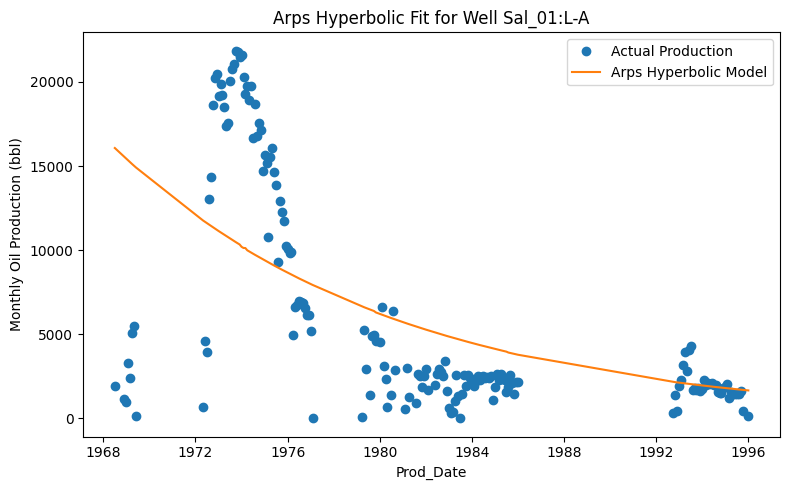

In [22]:
# Functions for fitting and plotting Arps Hyperbolic model
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def arps_hyperbolic(t, qi, Di, b):
    """Arps Hyperbolic model equation"""
    return qi / (1 + b * Di * t) ** (1/b)

def fit_arps_hyperbolic(t, q):
    """Fit Arps Hyperbolic model to production data"""
    p0 = [q[0], 0.1, 0.5]  # initial guess: qi, Di, b
    try:
        popt, pcov = curve_fit(arps_hyperbolic, t, q, p0=p0, bounds=([0,0,0],[np.inf,1,2]))
        return popt, pcov
    except Exception as e:
        print(f"Model fitting failed: {e}")
        return None, None

def plot_arps_fit(df_well, t, q, popt, well_id):
    """Plot actual production vs Arps Hyperbolic model"""
    if popt is None:
        print("No fit available to plot.")
        return
    q_pred = arps_hyperbolic(t, *popt)
    plt.figure(figsize=(8,5))
    plt.plot(df_well['Prod_Date'], q, 'o', label='Actual Production')
    plt.plot(df_well['Prod_Date'], q_pred, '-', label='Arps Hyperbolic Model')
    plt.xlabel('Prod_Date')
    plt.ylabel('Monthly Oil Production (bbl)')
    plt.title(f'Arps Hyperbolic Fit for Well {well_id}')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Convert monthly oil production to daily oil production (bbl/day) before fitting and plotting
def get_days_in_month(date):
    """Return number of days in the month for a given date (datetime)"""
    import calendar
    return calendar.monthrange(date.year, date.month)[1]



Fitted parameters for well Abz_A-14-01(Re):Ghr (bbl/day):
qi = 1240.67, Di = 0.0031, b = 0.00


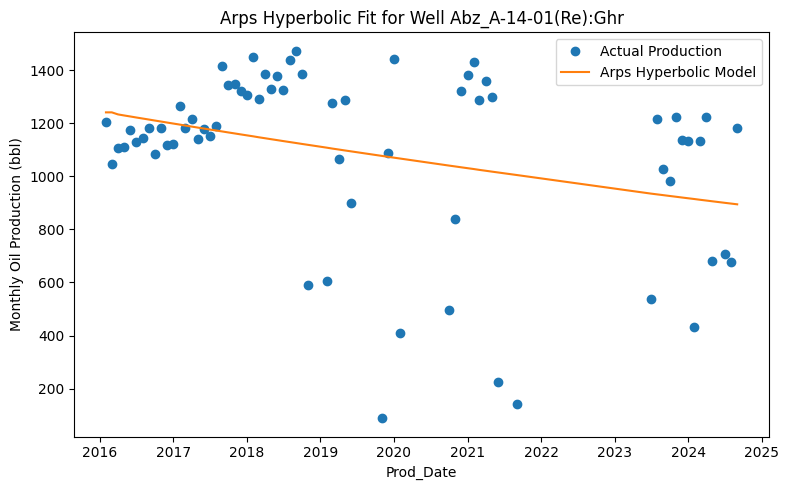

In [32]:
# Function to run Arps workflow for a given well name
def run_arps_for_well(df_all, well_name):
    """Prepare data, fit Arps Hyperbolic model, and plot for a given well name"""
    import calendar
    df_well = df_all[df_all['Well_Name'] == well_name].copy()
    if df_well.empty:
        print(f"No data found for well '{well_name}'")
        return
    df_well = df_well.sort_values('Prod_Date')
    df_well['Prod_Date'] = pd.to_datetime(df_well['Prod_Date'])
    df_well['days_in_month'] = df_well['Prod_Date'].apply(lambda d: calendar.monthrange(d.year, d.month)[1])
    df_well['oil_prod_daily'] = df_well['M_Oil_Prod'] / df_well['days_in_month']
    df_well['t'] = (df_well['Prod_Date'] - df_well['Prod_Date'].min()).dt.days // 30
    t = df_well['t'].values
    q = df_well['oil_prod_daily'].values
    popt, pcov = fit_arps_hyperbolic(t, q)
    if popt is not None:
        print(f"Fitted parameters for well {well_name} (bbl/day):")
        print(f"qi = {popt[0]:.2f}, Di = {popt[1]:.4f}, b = {popt[2]:.2f}")
    plot_arps_fit(df_well, t, q, popt, well_name)

# Example usage:
run_arps_for_well(df_all, df_all['Well_Name'].unique()[100])